In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [27]:
uniform_path = '/home/dhasade/audits/ml-audits/results/german_credit/merged_german_credit_uniform_n5.csv'
stratified_path = '/home/dhasade/audits/ml-audits/results/german_credit/merged_german_credit_stratified_n5.csv'
neyman_path = '/home/dhasade/audits/ml-audits/results/german_credit/merged_german_credit_neyman_n5.csv'

In [28]:
df_uniform = pd.read_csv(uniform_path)
df_stratified = pd.read_csv(stratified_path)
df_neyman = pd.read_csv(neyman_path)

In [29]:
df_uniform.head()

,dataset,collaboration,sample,agents,seed,budget,agent,attribute,dp_error
0,german_credit,none,uniform,5,10012,50,0,age,0.270133
1,german_credit,none,uniform,5,20012,50,1,sex,0.125199
2,german_credit,none,uniform,5,30012,50,2,marital_status,0.016592
3,german_credit,none,uniform,5,40012,50,3,own_telephone,0.138247
4,german_credit,none,uniform,5,50012,50,4,employment,0.009638


In [30]:
# concatenate the dataframes
df = pd.concat([df_uniform, df_stratified, df_neyman], axis=0, ignore_index=True)

In [31]:
# get average dp_error over group: dataset, collaboration, sample, budget, attribute
df_avg = df.groupby(['dataset', 'collaboration', 'sample', 'budget', 'attribute', 'agent']).mean().reset_index()

In [32]:
df_avg.head()

,dataset,collaboration,sample,budget,attribute,agent,agents,seed,dp_error
0,german_credit,none,neyman,50,age,0,5.0,10511.5,0.086702
1,german_credit,none,neyman,50,employment,4,5.0,50511.5,0.072962
2,german_credit,none,neyman,50,marital_status,2,5.0,30511.5,0.071151
3,german_credit,none,neyman,50,own_telephone,3,5.0,40511.5,0.076770
4,german_credit,none,neyman,50,sex,1,5.0,20511.5,0.070689


Text(0, 0.5, 'DP Error')

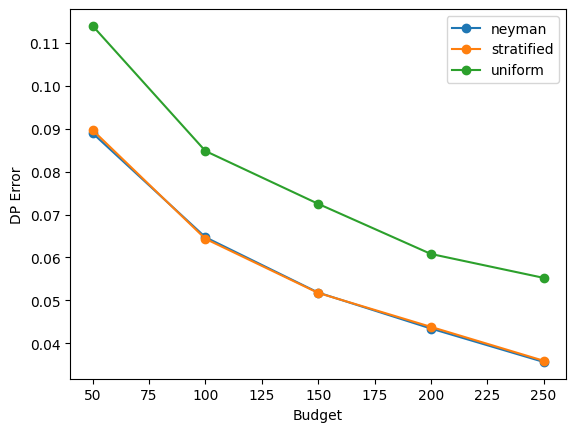

In [17]:
# plot the average dp_error over budget for each sample strategy
for sample in df_avg['sample'].unique():
    df_sample = df_avg[df_avg['sample'] == sample]
    plt.plot(df_sample['budget'], df_sample['dp_error'], label=sample, marker='o')

plt.legend()
plt.xlabel('Budget')
plt.ylabel('DP Error')

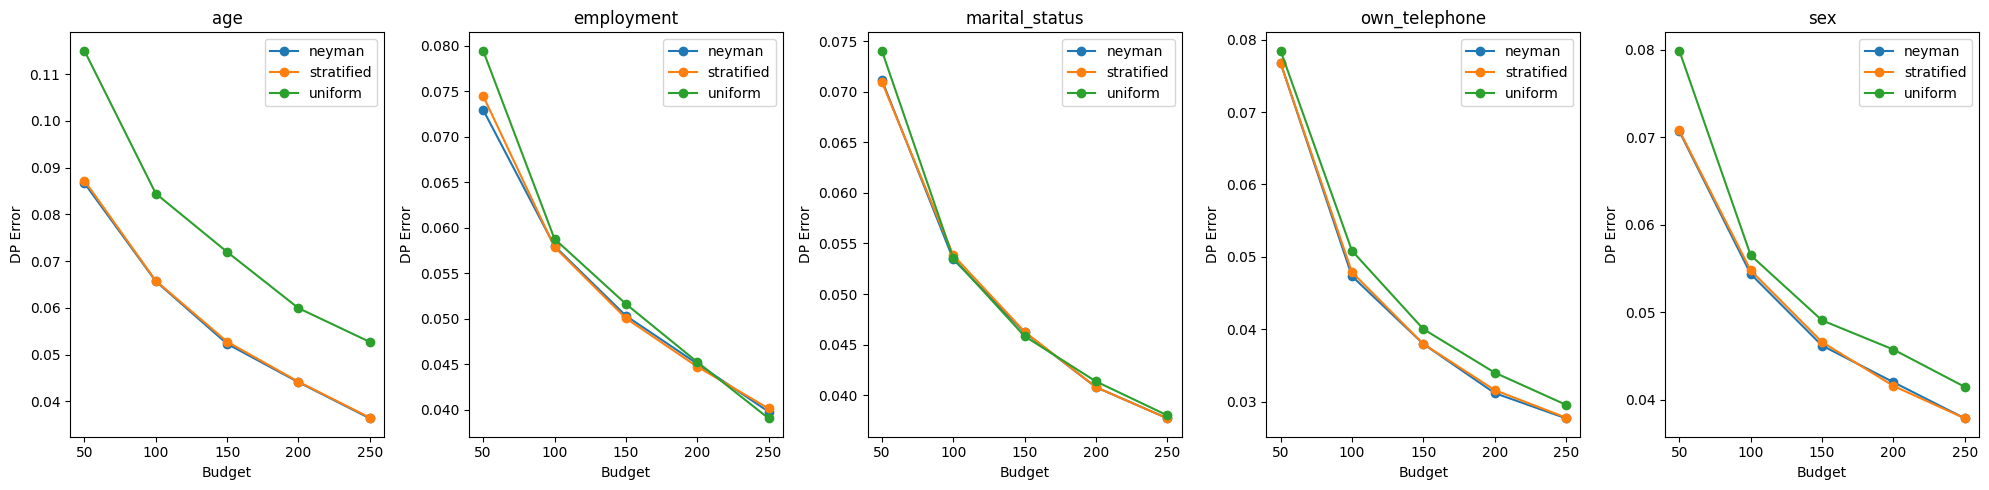

In [34]:
# create 5 subplots, one for each attribute
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, attribute in enumerate(df_avg['attribute'].unique()):
    df_attribute = df_avg[df_avg['attribute'] == attribute]
    for sample in df_attribute['sample'].unique():
        df_sample = df_attribute[df_attribute['sample'] == sample]
        axes[i].plot(df_sample['budget'], df_sample['dp_error'], label=sample, marker='o')
    axes[i].set_title(attribute)
    axes[i].set_xlabel('Budget')
    axes[i].set_ylabel('DP Error')
    axes[i].legend()

plt.tight_layout()
# plt.savefig('../results/plots/gc_neyman_no_collab.pdf', dpi=300, bbox_inches='tight')